### Pandas 객체(자료구조)
- 1차원 : 시리즈(Series)
- 2차원 : 데이터프레임(DataFrame)

In [435]:
# pandas 모듈을 불러와서 pd라는 별칭으로 사용
import pandas as pd

In [436]:
# 1차원 시리즈 생성
# list를 사용해서 Series 생성
# 도시별 인구수를 나타내는 Series 생성
pop = pd.Series([9602000,3344000,1488000,2419000])
pop

0    9602000
1    3344000
2    1488000
3    2419000
dtype: int64

In [437]:
# 시리즈 데이터에 인덱스를 지정하기
pop = pd.Series([9602000,3344000,1488000,2419000], index = ['서울','부산','광주','대구'])
pop

서울    9602000
부산    3344000
광주    1488000
대구    2419000
dtype: int64

In [438]:
# 딕셔너리를 이용해서 시리즈 생성해보기
# 면적에 대한 정보를 생성
area = pd.Series({'서울':605.2,'부산':770.1,'광주':501.1,'대구':883.5})
area

서울    605.2
부산    770.1
광주    501.1
대구    883.5
dtype: float64

- 데이터 속성 확인

In [439]:
# 1. value값만 확인하고 싶을 때
pop.values # 출력결과의 형태 : Numpy 배열

array([9602000, 3344000, 1488000, 2419000], dtype=int64)

In [440]:
# 2. 시리즈의 인덱스 값을 확인하고 싶을 때
pop.index # object --> 문자열 자료형

Index(['서울', '부산', '광주', '대구'], dtype='object')

In [441]:
# 3. 시리즈의 데이터 타입 확인
pop.dtype
area.dtype

dtype('float64')

#### 시리즈 이름 지정
- 시리즈의 이름은 DataFrame의 컬럼명이 된다

In [442]:
pop

서울    9602000
부산    3344000
광주    1488000
대구    2419000
dtype: int64

In [443]:
pop.name = '2020 인구'
pop

서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [444]:
pop.index.name = '도시'
pop

도시
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

#### 시리즈 데이터 갱신(수정, 삭제, 추가)

In [445]:
# 갱신(수정)
# 1. 인덱스 위치 접근
# 2. 값을 대입
pop.index.name = '지역'
pop

지역
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [446]:
# 부산 데이터를 3500000으로 수정
pop['부산'] = 3500000
pop

지역
서울    9602000
부산    3500000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [447]:
# 삭제 : drop()
# 광주 도시 삭제
pop.drop('광주', inplace = True)

# inpalce = False : 데이터를 삭제하고 초기화를 시켜주지 않음
# pop = pop.drop('광주')
# inpalce = True : 데이터를 삭제하고 원래 위치에 반영(초기화)

In [448]:
pop

지역
서울    9602000
부산    3500000
대구    2419000
Name: 2020 인구, dtype: int64

In [449]:
# 추가 : 없는 키 값 불러주고 갑을 대입
# '거제' : 250000
pop['거제'] = 250000
pop

지역
서울    9602000
부산    3500000
대구    2419000
거제     250000
Name: 2020 인구, dtype: int64

In [450]:
# 인덱스 이름 변경 : 지역 --> 도시
pop.index.name = '도시'
# 천안 데이터 추가 : '천안' : 660000
pop['천안'] = 660000
# 부산 데이터 수정 --> 3344000
pop['부산'] = 3344000
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

In [451]:
# 인덱스 이름 설정 --> 도시
area.index.name = '도시'
# 시리즈 이름 설정 --> 면적(㎢)
area.name = '면적(㎢)'
# 데이터 수정(광주 -> 거제), 천안(450.1) 추가
area.drop('광주', inplace=True)
area['거제'] = 501.1
area['천안'] = 450.1
area

도시
서울    605.2
부산    770.1
대구    883.5
거제    501.1
천안    450.1
Name: 면적(㎢), dtype: float64

In [452]:
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

#### 시리즈 병합(concat)
- 1차원을 연결하여 2차원으로 변환
- 시리즈의 이름이 데이터프레임의 컬럼명이 되는지 확인

In [453]:
# axis = 0 : 행방향 (수직방향)
# axis = 1 : 열방향 (수평방향)
df = pd.concat([pop, area]) # axis 기본값 -> 행방향
df

도시
서울    9602000.0
부산    3344000.0
대구    2419000.0
거제     250000.0
천안     660000.0
서울        605.2
부산        770.1
대구        883.5
거제        501.1
천안        450.1
dtype: float64

In [454]:
df2 = pd.concat([pop, area], axis=1) # axis = 1 --> 열방향
df2

# 시리즈의 이름이 컬럼명이 됨

2020 인구  면적(㎢)
도시                
서울  9602000  605.2
부산  3344000  770.1
대구  2419000  883.5
거제   250000  501.1
천안   660000  450.1

#### 2차원 데이터프레임 생성
- 리스트, 딕셔너리 자료를 활용하여 생성 가능

In [455]:
# 딕셔너리를 이용하여 데이터프레임 생성하기
data = {'2020 인구': [9602000, 3344000, 2419000], '면적(㎢)':[605.2, 770.1, 883.5]} # 키값이 컬럼명
data
df3 = pd.DataFrame(data, index=['서울','부산','대구'])
df3

2020 인구  면적(㎢)
서울  9602000  605.2
부산  3344000  770.1
대구  2419000  883.5

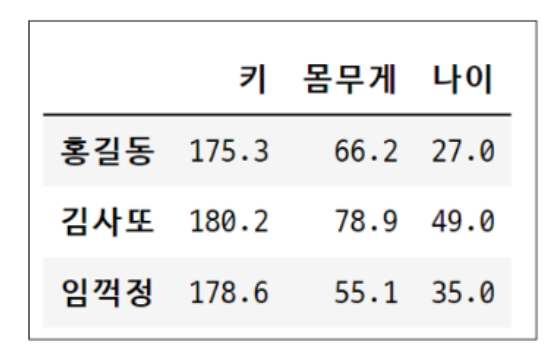

In [456]:
# 딕셔너리 이용
p_data = {'키':[175.3, 180.2, 178.6],'몸무게':[66.2, 78.9, 55.1],'나이':[27.0,49.0,35.0]}
p_data1 = pd.DataFrame(p_data, index=['홍길동', '김사또','임꺽정'])
p_data1

키   몸무게    나이
홍길동  175.3  66.2  27.0
김사또  180.2  78.9  49.0
임꺽정  178.6  55.1  35.0

In [457]:
p_t = pd.Series({'홍길동':175.3,'김사또':180.2,'임꺽정':178.6})
p_t.name = '키'
p_w = pd.Series({'홍길동':66.2,'김사또':78.9,'임꺽정':55.1})
p_w.name = '몸무게'
p_a = pd.Series({'홍길동':27.0,'김사또':49.0,'임꺽정':35.0})
p_a.name = '나이'

p_data2 = pd.concat([p_t,p_w,p_a] , axis=1)
p_data2


키   몸무게    나이
홍길동  175.3  66.2  27.0
김사또  180.2  78.9  49.0
임꺽정  178.6  55.1  35.0

In [458]:
# 행과 열을 전환해주는 키워드 : .T(전치 - transpose)
data1_T = p_data1.T
data1_T

홍길동    김사또    임꺽정
키    175.3  180.2  178.6
몸무게   66.2   78.9   55.1
나이    27.0   49.0   35.0

### Pandas 데이터 접근하기 : 인덱싱 & 슬라이싱

#### 시리즈 인덱싱

In [459]:
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

In [460]:
# 인덱싱으로 거제 데이터 접근
pop['거제']
pop[3]

250000

In [461]:
# 여러개 도시 데이터를 한번에 인덱싱하기
pop[['서울','대구','천안']]
pop[[0, 2, 4]]
pop[::2]

도시
서울    9602000
대구    2419000
천안     660000
Name: 2020 인구, dtype: int64

#### 시리즈 슬라이싱

In [462]:
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

In [463]:
# 부산 - 천안 접근해보기
pop['부산':'거제'] # 문자열로 접근할 때는 뒷값이 포함
pop[1:3]          # 인덱스 번호로 접근할 때는 뒷값이 포함이 안된다.

도시
부산    3344000
대구    2419000
Name: 2020 인구, dtype: int64

#### 시리즈 불리언 인덱싱

In [464]:
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

In [465]:
# 인구수가 1000000 미만인 도시 확인하기
pop[pop < 1000000]

도시
거제    250000
천안    660000
Name: 2020 인구, dtype: int64

In [466]:
# 백만미만인 도시명만 확인하고 싶을 때
pop[pop < 1000000].index

Index(['거제', '천안'], dtype='object', name='도시')

In [467]:
# 인구수가 200만 이상 ~ 500만 이하인 도시 확인하기
pop[(pop >= 2000000) & (pop <= 5000000)].index

Index(['부산', '대구'], dtype='object', name='도시')

In [468]:
# 학생 2명에 대한 성적 데이터 프레임 생성

df_stu = pd.DataFrame({'java':[95,85],'python':[100,95],'db':[85,85],'html/css':[70,75]}, index=['dw','eh'])
df_stu

java  python  db  html/css
dw    95     100  85        70
eh    85      95  85        75

In [469]:
# 'python' 과목 성적 데이터 접근
df_stu['python']

dw    100
eh     95
Name: python, dtype: int64

In [470]:
df_stu[['python']]

python
dw     100
eh      95

In [471]:
df_stu[['python','db']]

python  db
dw     100  85
eh      95  85

In [472]:
# df[:] -> 행 인덱싱
df_stu['java':'python']
df_stu['dw':'eh']
df_stu[1:]

java  python  db  html/css
eh    85      95  85        75

#### 행, 열에 접근하는 인덱서
- df[] -> 컬럼 인덱싱, df[:] -> 행 인덱싱
- loc, iloc 인덱서 등장
- df.loc[행], df.loc[행,열], df.loc[행:행,[열1,열3]] -> 실제 인덱스명 또는 컬럼명을 사용하여 데이터 접근
- df.iloc[행], df.iloc[행,열], df.iloc[행:행,[열1,열3]] -> numpy array 인덱스 값을 사용하여 데이터 접근

In [473]:
# dw 행 데이터 접근
# loc : 눈에 보이는 label 라벨 값
df_stu.loc['dw']

java         95
python      100
db           85
html/css     70
Name: dw, dtype: int64

In [474]:
# iloc : 인덱스 값
df_stu.iloc[0]

java         95
python      100
db           85
html/css     70
Name: dw, dtype: int64

In [475]:
# df_stu dw, eh 행인덱싱
df_stu.loc['dw':'eh']
# df_stu eh, dw 행인덱싱
df_stu.loc[['eh','dw']]

java  python  db  html/css
eh    85      95  85        75
dw    95     100  85        70

In [476]:
# df_stu iloc 열 접근
# java 컬럼 접근해보기
df_stu.iloc[:,0]
# dw, java 점수 접근
df_stu.iloc[0,0]

95

In [477]:
# df_stu dw의 python, html/css 점수에 접근해보기
df_stu.iloc[0,1::2]
df_stu.iloc[0,[1,3]]
df_stu.loc['dw',['python','html/css']]
df_stu.loc['dw','python':'html/css':2]

python      100
html/css     70
Name: dw, dtype: int64

#### DataFrame 불리언 인덱싱
- 논리 연산자를 활용하여 데이터 접근

In [478]:
# 행 데이터 추가
# 1. 행 접근(없는 이름) 2. 대입
df_stu.loc['dh'] = [95,95,85,100]

In [479]:
df_stu

java  python  db  html/css
dw    95     100  85        70
eh    85      95  85        75
dh    95      95  85       100

In [480]:
# 컬럼 추가
# 1. 컬럼 접근(없는 이름) 2. 대입
df_stu.loc[:,'ml'] = [100,100,100]
df_stu

java  python  db  html/css   ml
dw    95     100  85        70  100
eh    85      95  85        75  100
dh    95      95  85       100  100

In [481]:
# java 성적에서 90이상인 사람의 이름은 ?
# 1. java 컬럼 접근
# 2. 논리 연산자로 조건 질문 던지기
# 3. True, False -> data에 대입 (masking)
df_stu[df_stu.loc[:,'java'] >= 90] # 불리언 인덱싱이 행 인덱싱으로 작용

df_stu[df_stu.loc[:,'java'] >= 90].index

Index(['dw', 'dh'], dtype='object')

In [482]:
# python 성적이 100점인 사람은 몇명인가 ?
py_100 = df_stu[df_stu['python'] == 100].index.size
print(f'python 성적이 100점인 사람은 몇명인가 ? {py_100}명')

python 성적이 100점인 사람은 몇명인가 ? 1명


In [483]:
# df_stu[df_stu.iloc[0] == 100] # iloc 인덱서는 불리언 인덱싱과 호환이 안됨
df_stu[df_stu.loc[:,'java'] == 100] # loc 인덱서는 불리언 인덱싱과 호환이 된다

Empty DataFrame
Columns: [java, python, db, html/css, ml]
Index: []

### Pandas 유용한 함수

####  value_counts() : 값이 등장한 횟수 세는 기능

In [484]:
df_stu['java'].value_counts()

95    2
85    1
Name: java, dtype: int64

In [485]:
# python에서 가장 많이 나온 성적의 개수는 ?
df_stu['python'].value_counts()

95     2
100    1
Name: python, dtype: int64

In [486]:
# 빈도수 파악 -> 카테고리 형식(범주형) 데이터에 자주 사용
# 기술통계량 파악 -> 값의 크고 작음의 의미가 있는 숫자 데이터(수치형) 자주 사용

#### sort_values(), sort_index() : 정렬하는 함수

In [487]:
# value 값 기준 정렬, 기본값 : 오름차순 정렬 (ascending = True)
# ascending = False : 내림차순 정렬
pop.sort_values(ascending=False)

도시
서울    9602000
부산    3344000
대구    2419000
천안     660000
거제     250000
Name: 2020 인구, dtype: int64

In [488]:
# index 정렬  기본값 : 오름차순 정렬 (ascending = True)
# ascending = False : 내림차순 정렬
pop.sort_index(ascending = False)

도시
천안     660000
서울    9602000
부산    3344000
대구    2419000
거제     250000
Name: 2020 인구, dtype: int64

#### drop() : 데이터를 삭제하는 함수
- 행 이름 삭제해줘, 컬럼 이름 삭제해줘 !
- axis = 0 (행 방향으로 데이터 확인), axis = 1 (열 방향으로 데이터 확인)

In [489]:
# 행 데이터 삭제
df_stu.drop('dh')

java  python  db  html/css   ml
dw    95     100  85        70  100
eh    85      95  85        75  100

In [490]:
# 열 데이터 삭제
# ml 삭제하기
df_stu.drop('ml', axis=1, inplace=True)

In [491]:
# 한글 불러오는 encoding 방식 : utf-8, euc-kr, cp949
score = pd.read_csv('data/score.csv', index_col='과목', encoding='euc-kr') # 과목명을 인덱스로 사용 !
score

1반  2반  3반  4반
과목                
수학  45  44  73  39
영어  76  92  45  69
국어  47  92  45  69
사회  92  81  85  40
과학  11  79  47  26

In [492]:
# 데이터 확인하기
# 크기 확인
display(score.shape)
# 데이터 타입
display(score[:].dtypes)
# 컬럼명(이름) 확인
display(score.columns)
# 행 이름
display(score.index)

(5, 4)

1반    int64
2반    int64
3반    int64
4반    int64
dtype: object

Index(['1반', '2반', '3반', '4반'], dtype='object')

Index(['수학', '영어', '국어', '사회', '과학'], dtype='object', name='과목')

#### 데이터 정보 출력하는 함수

In [493]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 수학 to 과학
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1반      5 non-null      int64
 1   2반      5 non-null      int64
 2   3반      5 non-null      int64
 3   4반      5 non-null      int64
dtypes: int64(4)
memory usage: 200.0+ bytes


In [494]:
# 결측치 확인하는 함수 : isnull()
score.isnull().sum()

# 결측치 0 : True, 결측치 X : Falese

1반    0
2반    0
3반    0
4반    0
dtype: int64

#### 총합을 구하는 함수

In [495]:
score.isnull().sum(axis=1)

과목
수학    0
영어    0
국어    0
사회    0
과학    0
dtype: int64

#### 학급별 순위(성적이 높은 순서부터)

In [496]:
score.sum().sort_values(ascending=False)

# score.sort_values(by=['컬럼명1', '컬럼명2'], ascending=[False, True])
# 컬럼명1 : 내림차순, 컬럼명2 : 오름차순
# by와 ascending에 입력할 원소의 갯수는 같아야함

2반    388
3반    295
1반    271
4반    243
dtype: int64

#### 과목별 합계를 계산하여 '합계'컬럼으로 추가하기

In [497]:
total = score.sum(axis=1)

In [498]:
score['합계'] = total
score

1반  2반  3반  4반   합계
과목                     
수학  45  44  73  39  201
영어  76  92  45  69  282
국어  47  92  45  69  253
사회  92  81  85  40  298
과학  11  79  47  26  163

#### 과목별 평균을 계산하여 '평균'컬럼으로 추가하기

In [499]:
total_avg = score['합계']/score.columns[:4].size # len(score.columns[:4])

In [500]:
score['평균'] = total_avg
score

1반  2반  3반  4반   합계     평균
과목                            
수학  45  44  73  39  201  50.25
영어  76  92  45  69  282  70.50
국어  47  92  45  69  253  63.25
사회  92  81  85  40  298  74.50
과학  11  79  47  26  163  40.75

In [501]:
score.loc[:,:'4반'].mean(axis=1)

과목
수학    50.25
영어    70.50
국어    63.25
사회    74.50
과학    40.75
dtype: float64

#### 반 평균을 계산하여 새로운 행('반 평균')으로 추가하기

In [502]:
class_total = score.sum()

In [503]:
class_avg = class_total/score.index.size

In [504]:
score.loc['반평균'] = class_avg # score.mean()
score

1반    2반    3반    4반     합계     평균
과목                                       
수학   45.0  44.0  73.0  39.0  201.0  50.25
영어   76.0  92.0  45.0  69.0  282.0  70.50
국어   47.0  92.0  45.0  69.0  253.0  63.25
사회   92.0  81.0  85.0  40.0  298.0  74.50
과학   11.0  79.0  47.0  26.0  163.0  40.75
반평균  54.2  77.6  59.0  48.6  239.4  59.85

#### 최댓값, 최소값 구하는 함수
- max, min

In [526]:
# max() : 열방향 최댓값
score.max(axis=1)
# min() : 행방향 최소값
# score.min(axis=0)

과목
수학     201.0
영어     282.0
국어     253.0
사회     298.0
과학     163.0
반평균    239.4
dtype: float64

In [524]:
# 1반부터 4반까지 점수 중 과목별 가장 큰 값과 가장 작은 값의 차이를 구하기
max_s = score.loc[:'과학',:'4반'].max(axis=1)
min_s = score.loc[:'과학',:'4반'].min(axis=1)

In [525]:
max_s - min_s

과목
수학    34.0
영어    47.0
국어    47.0
사회    52.0
과학    68.0
dtype: float64

#### cut 함수 : 수치형 데이터 --> 범주형 데이터 변경

In [533]:
ages = [0,2,10,21,23,37,31,61,20,14,32,100]
bins = [-1, 15, 30, 40, 60, 100] # 구간 설정, 시작값은 포함되지 않고, 끝값은 포함
labels = ['미성년자','청년','장년','중년','노년']
cate = pd.cut(ages, bins=bins, labels=labels)
pd.Series(cate)

0     미성년자
1     미성년자
2     미성년자
3       청년
4       청년
5       장년
6       장년
7       노년
8       청년
9     미성년자
10      장년
11      노년
dtype: category
Categories (5, object): ['미성년자' < '청년' < '장년' < '중년' < '노년']

#### groupby() : 데이터를 그룹별로 묶어 집계낼 수 있게 하는 함수

In [534]:
s1 = pd.Series([1,0,1,0,1])
s2 = pd.Series(['female','female','male','male','female'])
s3 = pd.Series([1,2,3,4,5])

ti = pd.concat([s1,s2,s3], axis =1)
ti.columns = ['Servived', 'Sex', 'PassengerId']
ti

Servived     Sex  PassengerId
0         1  female            1
1         0  female            2
2         1    male            3
3         0    male            4
4         1  female            5

In [537]:
# 성별에 따른 생존자 수 확인하기
ti[['Servived','Sex']].groupby('Sex').sum() # 성별을 기준으로 묶어서 결과를 반환

Servived
Sex             
female         2
male           1

In [558]:
# 성별에 따른 생존자 수 / 사망자 수 확인하기
ti.groupby(by=['Sex','Servived']).count()

PassengerId
Sex    Servived             
female 0                   1
       1                   2
male   0                   1
       1                   1

In [ ]:
# Pandas 공식 사이트 (https://pandas.pydata.org/)